# Builder Tutorial number 1

The builder tutorials demonstrate how to build an operational GSFLOW model using `pyGSFLOW` from shapefile, DEM, and other common data sources. These tutorials focus on the `gsflow.builder` classes.

## Generating a fishnet from raster, shapefile, or a user provided extent

In this tutorial, we demonstrate how to build a "fishnet" (modelgrid) using raster data, shapefile data, or a user provided extent. Generating a "fishnet" (`StructuredGrid` object) is the first step in building a GSFLOW model and will be used for later processing.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import flopy

### The `GenerateFishnet` class

The `GenerateFishnet` class creates a minimal `flopy.discretization.StructuredGrid` object that represents the model discretization. The class has 4 input parameters

   - `bbox` :  bounding box for modelgrid. The bounding box can be a the extent read from a shapfile, the extent read in from a raster, or a list of (xmin, xmax, ymin, ymax)
   - `xcellsize` : cell size in the x-direction 
   - `ycellsize` : cell size in the y-direction 
   - `buffer` : number of cells to buffer around the input geometry, negative values buffer on the inside of the bounding box
   
The resulting object will have all of the functionality of a `StructuredGrid` object
   
Let's start with importing the class

In [2]:
from gsflow.builder import GenerateFishnet

### Creating a fishnet using raster data

In this example, we will create a fishnet using a raster as the bbox input. This raster is projected in UTM coordinates (units are meters).

In [3]:
raster = os.path.join('data', 'geospatial', 'dem.img')

# set our cell size in meters.
dx = 150
dy = 150
modelgrid = GenerateFishnet(raster, xcellsize=dx, ycellsize=dy)
print(type(modelgrid))
print(modelgrid.__class__.__bases__)
print(modelgrid.extent)

<class 'gsflow.builder.fishnet.GenerateFishnet'>
(<class 'flopy.discretization.structuredgrid.StructuredGrid'>,)
(214270.0, 221770.0, 4366610.0, 4373510.0)


As is shown, The GenerateFishnet object inherits its functionality from the `flopy.discretization.StructuredGrid` object. That means we have access to all of the built in associated with that class.

Now the results can be verified by plotting the `GenerateFishnet` object over the raster data.

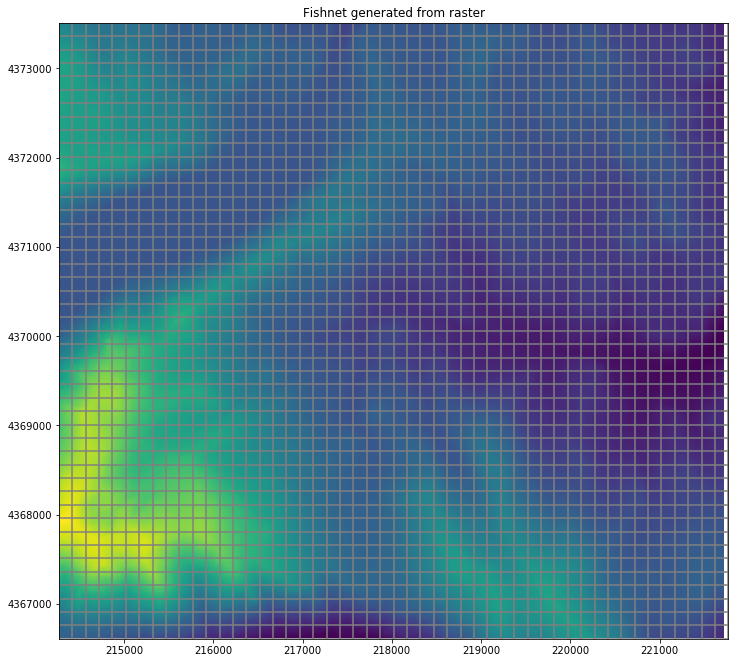

In [4]:
# let's load the raster for plotting
robj = flopy.utils.Raster.load(raster)

# plot the fishnet on top of the raster imagery
fig, ax = plt.subplots(figsize=(12, 12))

robj.plot(ax=ax)
modelgrid.plot(ax=ax)
ax.set_title("Fishnet generated from raster");

### Creating a fishnet using shapefile data

The user can supply `bbox` with a path to a shapefile to generate a fishnet. The code reads the shapefile extent and then uses that to generate the fishnet

In [5]:
shp_file = os.path.join('data', 'geospatial', 'fishnet_boundary.shp')

dx = 150
dy = 300
# let's buffer the fishnet on the inside of the bounding geometry by 1 cell in this example
modelgrid = GenerateFishnet(shp_file, xcellsize=dx, ycellsize=dy, buffer=-1)
extent = modelgrid.extent
print(extent)

(214420.43465577718, 221620.43465577718, 4366912.745040843, 4373212.745040843)


Now the results can be verified by plotting the `GenerateFishnet` object over the shapefile data.

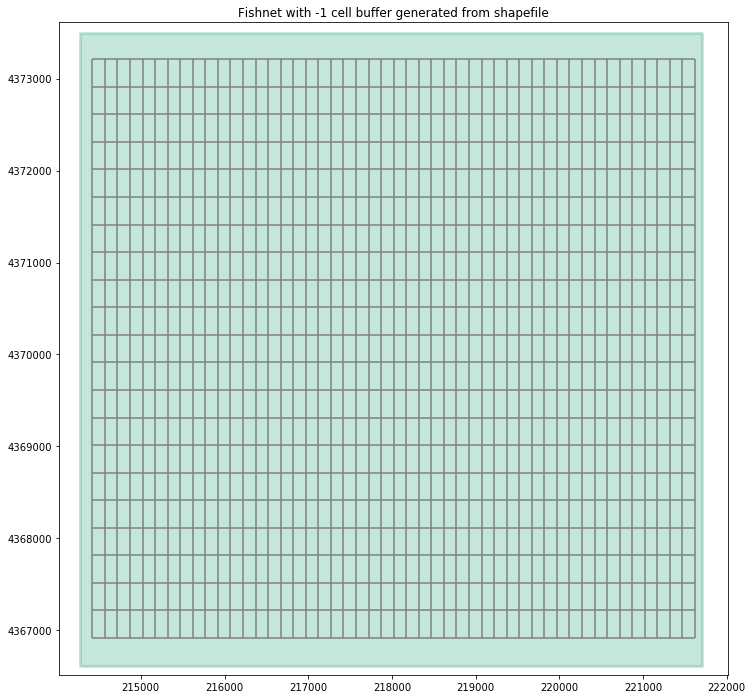

In [6]:
# create a buffer around the modelgrid extent for plotting purposes
plot_extent = (extent[0] - 400, extent[1] + 400, extent[2] - 400, extent[3] + 400)


# plot the shapefile over the fishnet for verification
fig, ax = plt.subplots(figsize=(12, 12))

pmv = flopy.plot.PlotMapView(modelgrid=modelgrid, ax=ax, extent=plot_extent)

pmv.plot_grid()
pmv.plot_shapes(shp_file, alpha=0.25, lw=3)

ax.set_title("Fishnet with -1 cell buffer generated from shapefile");

### Create a fishnet with user defined bounding box

A user can also supply either a tuple, list, or numpy array of xmin, xmax, ymin, ymax to create a fishnet.

In [7]:
bbox = [10, 100, 15, 105]

dx = 10
dy = 5
modelgrid = GenerateFishnet(bbox, xcellsize=dx, ycellsize=dy)
extent = modelgrid.extent
print(modelgrid)
print(extent)

xll:10; yll:15; rotation:0.0; units:undefined; lenuni:0
(10.0, 100.0, 15.0, 105.0)


And once again we can verify our data by plotting our extent over the fishnet

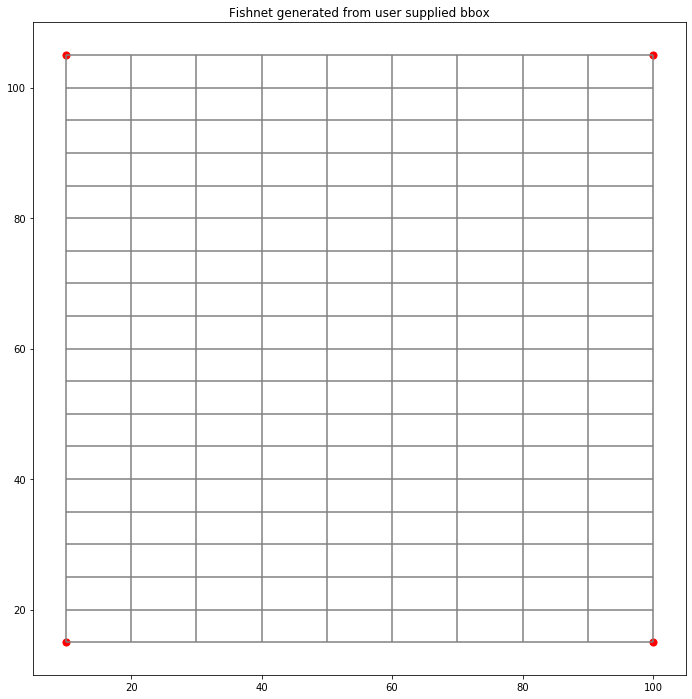

In [8]:
# create a plotting extent to see all points

# create a series of points from our extent to plot
xv = [extent[0], extent[1], extent[1], extent[0]]
yv = [extent[2], extent[2], extent[3], extent[3]]

# plot our extent as points over the modelgrid
fig, ax = plt.subplots(figsize=(12, 12))

modelgrid.plot(ax=ax)
ax.scatter(xv, yv, c='r', s=50)

# set xlim and ylim to clearly see the points on the grid edge
ax.set_xlim([extent[0] - 5, extent[1] + 5])
ax.set_ylim([extent[2] - 5, extent[3] + 5])

ax.set_title("Fishnet generated from user supplied bbox");

## Applying `GenerateFishnet` to build the Sagehen 50m example problem

In this section we apply `GenerateFishnet` to build the Sagehen 50m example problem's modelgrid which will be used in subsequent examples.

In [9]:
cellsize = 50

modelgrid = GenerateFishnet(raster, xcellsize=cellsize, ycellsize=cellsize)
print(modelgrid.extent)

(214270.0, 221720.0, 4366610.0, 4373510.0)


Now the modelgrid can be inspected using flopy's plotting routines

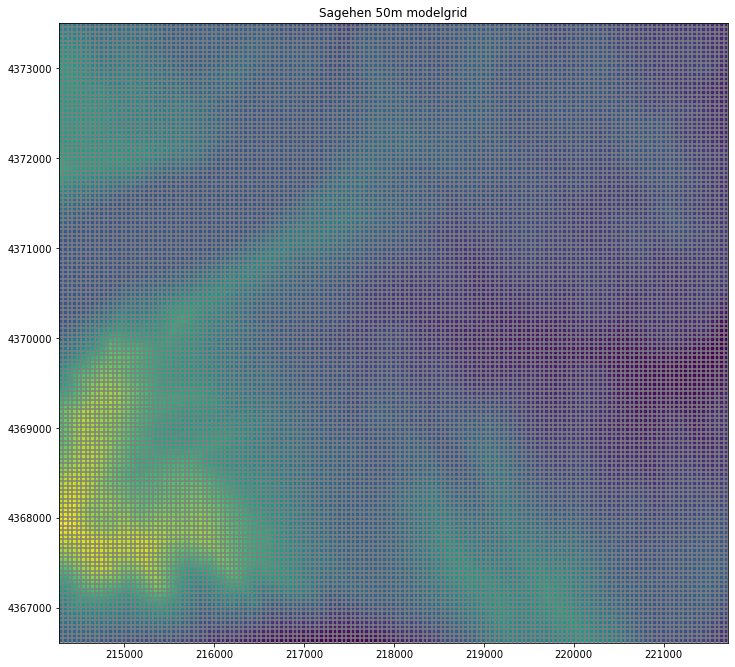

In [10]:
# plot the fishnet on top of the raster imagery
fig, ax = plt.subplots(figsize=(12, 12))

robj.plot(ax=ax)
modelgrid.plot(ax=ax)
ax.set_title("Sagehen 50m modelgrid");

Finally the modelgrid can be saved as a binary file for later use

In [11]:
grid_file = os.path.join("data", "temp", "sagehen_50m_grid.bin")

modelgrid.write(grid_file)

The modelgrid can also be reloaded using the `GenerateFishnet.load_from_file()` method 

In [12]:
modelgrid = GenerateFishnet.load_from_file(grid_file)

print(type(modelgrid))
print(modelgrid.__class__.__bases__)
print(modelgrid.extent)

<class 'gsflow.builder.fishnet.GenerateFishnet'>
(<class 'flopy.discretization.structuredgrid.StructuredGrid'>,)
(214270.0, 221720.0, 4366610.0, 4373510.0)
